# Outlier Analysis


In this course, We will learn about:

1. What is an outlier
2. Causes of outliers
3. Types of outliers
4. Techniques for Detecting Outliers in data
5. Using PyOD library to analyse outliers



## What is an outlier and How do outliers affect a regression model?

An outlier is an observation which is generally outside the normal range of variation within the data distribution. 
An outlier is an observation that diverges from an overall pattern on a sample.

Simply put, an outlier is an extremely high or extremely low value in a dataset.


Outliers can be classified broadly into two categories:


* <b>Mild Outlier:</b> An observation which lies within a range greater than 1.5 times the inter-quartile range (IQR) and less than 3 times the IQR, beyond the 3rd quartile (or 75th percentile) or below the 1st quartile (or 25th percentile) is termed as a mild outlier.

In general, in a set of values such as {2, 6,11, 13, 14, 15, 16 ,17}, outliers are defined as:

>Mild Outlier if 
> value is less than 1st Quartile - 1.5 times Interquartile Range  
< Q1 - 1.5*(IQR)

OR
> value is greater than 3rd Quartile + 1.5 times Interquartile Range  
"> Q3 + 1.5*(IQR)



* <b>Extreme Outlier:</b> An observation which lies within a range greater than 3 times the inter-quartile range (IQR), beyond the 3rd quartile (or 75th percentile) or below the 1st quartile (or 25th percentile) is termed as an extreme outlier.

>Extreme Outlier if 
> value is less than 1st Quartile - 3 times Interquartile Range  
< Q1 - 3*(IQR)

OR
> value is greater than 3rd Quartile + 3 times Interquartile Range  
"> Q3 + 3*(IQR)


<img src = "../../../images/levinfluence.png" style="width:50vw">

<img src = "../../../images/mildextreme.png" style="width:70vw">


<br>

In a simple linear regression model, a line is fit to a set of observations. The line is extended in order to predict unknown observations. Now, if we employ the least squares method and look at the mechanism of how that line is fit, we can see that the line of best fit is determined by calculating the means of each indepedent and dependent variables and determining the slope and intercept of the line passing through mean of observations. If an extreme value is added to the set of observations, the mean can be swayed drastically and this in turn affects the line fit, and the regression model, thereby.

Many basic prediction algorithms depend upon the measures of central tendency and associated measures and these measures are very susceptible to the presence of an extreme value (outlier) in the data set. It is for this reason that outlier identification is essential in order to maintain an accurate depiction of normal behavior and a reasonable prediction.

### Identification of Influential Data Points

When you plot the distribution of a real-world dataset, you may find some extreme observations. These observations may be caused by - 

* Erroneous data recording/data capture
* An acceptable anamoly

When the extreme value is caused by an erroneous recording or capture of data from the source, it may sometimes fall well outside the permissible range and be termed as an extreme outlier. Such kind of data points can be removed from the set as they are not representative of a normal/common observation set. When they are formed by an 'acceptable anamoly', i.e., an anamoly which is known to occur but the occurrence of such observation is extremely rare, in such a case, the value may be of interest. In either case, when an extreme observation is retained in a data set, it leads to drastic difference in some descriptive statistics and analyses based on such statistics. In order to deal with such observations, we can employ some techniques which help us identify the points (or observations) which are more influential on the entire dataset.


### Difference in Fits Method

When modeling a linear regression using the least square approach, the line of best fit is determined by measuring the sum of distances from each point/observation to the line. The equation of the line is a function which determines value of dependent variable(s) based on predictors (or independent variables). In order to measure the influence of a given point on the regression model, the difference of fits method tries to measure the variation of prediction of the independent variable with and without including the point. To break this approach down into simpler steps - 

* Step 1 - Say we have a set of points (observations) determined by **o<sub>1</sub>, o<sub>2</sub>, o<sub>3</sub>...o<sub>n</sub>** where 'n' is the total number of observations. Assume that we are trying to measure the influence of an 'i<sup>th</sup>'observation **o<sub>i</sub>** on the regression model.
* Step 2 - A trend is fit for the entire data of 'n' observations and a prediction is made and recorded. Lets say this prediction is **y<sub>n</sub>**.
* Step 3 - The observation **o<sub>i</sub>** is excluded from the data set and again a trend is fit, now on 'n-1' observations. A prediction is made and recorded, say **y<sub>i</sub>**.
* Step 4 - Calculate the mean squared error (MSE) for the 'n-1' observations and call it MSE<sub>i</sub>
* Step 5 - Now, the difference in fits is measured using the formula:

**Difference in fits (i)** = $\frac{y_n-y_i}{\sqrt{MSE_i*h_{ii}}}$

In a given dataset, if the DFFITS value of an observation is drastically different from all other observations, then such a point/observation can be identified as an influential point. This is possible in small datasets. However, if the data set is large enough we require a comparison metric. Various statisticians employ various metric to determine whether a point's DFFITS value refers to it being influential or not. Some of the metrics that can be used are:

* $2*\sqrt{\frac{k}{n}}$
* $2*\sqrt{\frac{k+1}{n}}$
* $2*\sqrt{\frac{p+1}{n-p-1}}$

where 'n' is sample size (total number of observations or data points), 'k' is total number of predictors and 'p' is total number of parameters (k + total number of intercepts).


Text(0.5,0.98,'With Outlier Removed')

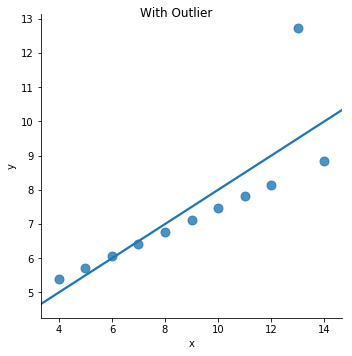

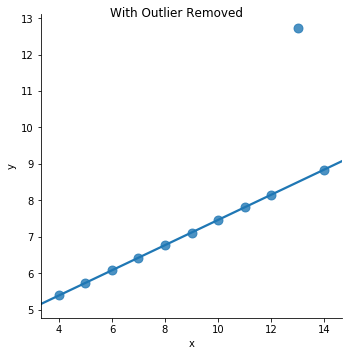

In [6]:
#No Exercise
import seaborn as sns
anscombe = sns.load_dataset("anscombe")

lm = sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None,  scatter_kws={"s": 80});
fig = lm.fig 
fig.suptitle("With Outlier", fontsize=12)


#In case of such ouliers, we can use parameter robust=True
#This removes the outlier from the estimate function and plots the other data points better.
lm2 = sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});
fig2 = lm2.fig 
fig2.suptitle('With Outlier Removed', fontsize=12)


## Solution


# Causes of Outliers

Most common causes of outliers on a data set:

<li>Data entry errors (human errors)

<li>Measurement errors (instrument errors)

<li>Experimental errors (data extraction or experiment planning/executing errors)

<li>Intentional (dummy outliers made to test detection methods)

<li>Data processing errors (data manipulation or data set unintended mutations)

<li>Sampling errors (extracting or mixing data from wrong or various sources)

<li>Natural (not an error, novelties in data)


## Types of outliers


Outliers can be classified in different ways. One of the key classification of outliers is based on the number of variables used in the data. Such as 

<li><b>univariate</b> and 
<li><b>multivariate</b> outliers.
    
For univariate outliers, it is easy to detect manually. 
For multivariate outliers, we need technics to detect the same.

Outliers can also come in different types, such as: 
<li>point outliers, 
<li>contextual outliers 
<li>collective outliers. 

### Point outliers
Point outliers are single data points that lay far from the rest of the distribution. 

### Contextual outliers 

Contextual outliers can be noise in data, such as punctuation symbols when realizing text analysis or background noise signal when doing speech recognition. 

### Collective outliers 

Collective outliers can be subsets of novelties in data such as a signal that may indicate the discovery of new phenomena.

In [7]:
#No Exercise

## Solution

## Outlier Detection Method




### Z-Score

The z-score or standard score of an observation is a metric that indicates how many standard deviations a data point is from the sample’s mean, assuming a gaussian distribution. This makes z-score a parametric method. Very frequently data points are not to described by a gaussian distribution, this problem can be solved by applying transformations to data ie: scaling it.

Some Python libraries like Scipy and Sci-kit Learn have easy to use functions and classes for a easy implementation along with Pandas and Numpy.

### Dbscan

Dbscan is a density based clustering algorithm, it is focused on finding neighbors by density (MinPts) on an ‘n-dimensional sphere’ with radius ɛ. A cluster can be defined as the maximal set of ‘density connected points’ in the feature space.

Dbscan then defines different classes of points:

Core point: A is a core point if its neighborhood (defined by ɛ) contains at least the same number or more points than the parameter MinPts.
Border point: C is a border point that lies in a cluster and its neighborhood does not contain more points than MinPts, but it is still ‘density reachable’ by other points in the cluster.
Outlier: N is an outlier point that lies in no cluster and it is not ‘density reachable’ nor ‘density connected’ to any other point. Thus this point will have “his own cluster”.

A cluster satisfies two properties:

All points within the cluster are mutually density-connected.
If a point is density-reachable from any point of the cluster, it is part of the cluster as well.
Sci-kit Learn has an implementation of dbscan that can be used along pandas to build an outlier detection model.

Again, the first step is scaling the data, since the radius ɛ will define the neighborhoods along with MinPts. (Tip: a good scaler for the problem at hand can be Sci-kit Learn’s Robust Scaler).

After scaling the feature space, is time to choose the spatial metric on which dbscan will perform the clustering. The metric must be chosen depending on the problem, an euclidean metric works well for 2 or 3 dimensions, the manhattan metric can also be useful when dealing with higher dimensional feature spaces 4 or more dimensions.

Then, the parameter eps (ɛ) must be chosen accordingly to perform clustering. If ɛ is too big many points will be density connected, if its too small the clustering will result in many meaningless clusters. A good approach is to try values ranging from 0.25 to 0.75.

Dbscan is also sensitive to the MinPts parameter, tuning it will completely depend on the problem at hand.

The complexity of dbscan is of O(n log n), it and effective method with medium sized data sets. Feeding data to the model is easy when using Scikit learn’s implementation. After fitting dbscan to the data clusters can be extracted and each sample is assigned to a cluster. Dbscan estimates the number of clusters by itself, there is no need to specify the number of desired clusters, it is an unsupervised machine learning model.

Outliers (noise) will be assigned to the -1 cluster. After tagging those instances, they can be removed or analyzed.

### Isolation Forests

Last but not least, isolation forests are an effective method for detecting outliers or novelties in data. It is a relatively novel method based on binary decision trees. Sci-Kit Learn’s implementation is relatively simple and easy to understand.

Isolation forest’s basic principle is that outliers are few and far from the rest of the observations. To build a tree (training), the algorithm randomly picks a feature from the feature space and a random split value ranging between the maximums and minimums. This is made for all the observations in the training set. To build the forest a tree ensemble is made averaging all the trees in the forest.

Then for prediction, it compares an observation against that splitting value in a “node”, that node will have two node children on which another random comparisons will be made. The number of “splittings” made by the algorithm for an instance is named: “path length”. As expected, outliers will have shorter path lengths than the rest of the observations.

In [11]:
#no exercise

## Solution

## Using PyOD library to analyse outliers

### What is PyOD?

PyOD is a python library for Outlier Detection.


To install PyOD use pip install as shown below:

```shell
pip install pyod

```
PyOD provides various individual models, combinations and data generation utilities.

```python
from pyod.utils.data import generate_data, get_outliers_inliers

```

Here are some of the algorithms available in PyOD for outlier detection. 

  1. Linear Models for Outlier Detection:
     1. **PCA: Principal Component Analysis** use the sum of
       weighted projected distances to the eigenvector hyperplane 
       as the outlier outlier scores)
     2. **MCD: Minimum Covariance Determinant** (use the mahalanobis distances 
       as the outlier scores)
     3. **OCSVM: One-Class Support Vector Machines**
     
  2. Proximity-Based Outlier Detection Models:
     1. **LOF: Local Outlier Factor**
     2. **CBLOF: Clustering-Based Local Outlier Factor**
     3. **kNN: k Nearest Neighbors** (use the distance to the kth nearest 
     neighbor as the outlier score)
     4. **Median kNN** Outlier Detection (use the median distance to k nearest 
     neighbors as the outlier score)
     5. **HBOS: Histogram-based Outlier Score**
     
  3. Probabilistic Models for Outlier Detection:
     1. **ABOD: Angle-Based Outlier Detection**
  
  4. Outlier Ensembles and Combination Frameworks
     1. **Isolation Forest**
     2. **Feature Bagging**
     3. **LSCP**

### Proximity-Based Outlier Detection Models : k-Nearest Neighbors Detector

For any data point, the distance to its kth nearest neighbor could be viewed as the outlying score

PyOD supports three kNN detectors:


Largest: Uses the distance of the kth neighbor as the outlier score
Mean: Uses the average of all k neighbors as the outlier score
Median: Uses the median of the distance to k neighbors as the outlier score

To use KNN model import KNN from pyod.models.knn as shown below:

```python
from pyod.models.knn import KNN

```


### Probabilistic Models for Outlier Detection : Angle-Based Outlier Detection (ABOD)

It considers the relationship between each point and its neighbor(s). It does not consider the relationships among these neighbors. The variance of its weighted cosine scores to all neighbors could be viewed as the outlying score

ABOD performs well on multi-dimensional data

PyOD provides two different versions of ABOD:

Fast ABOD: Uses k-nearest neighbors to approximate
Original ABOD: Considers all training points with high-time complexity

To use ABOD model import ABOD from pyod.models.abod as shown below:

```python
from pyod.models.abod import ABOD

```



Exercise:

Run the code below to visualize the plot for Outlier Detection using KNN and ABOD

No of Errors :  Angle-based Outlier Detector (ABOD) 3
No of Errors :  K Nearest Neighbors (KNN) 3


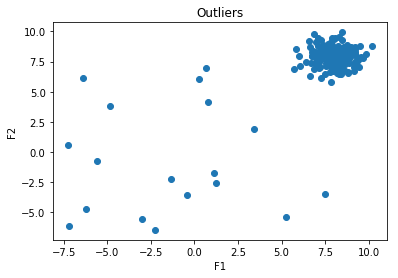

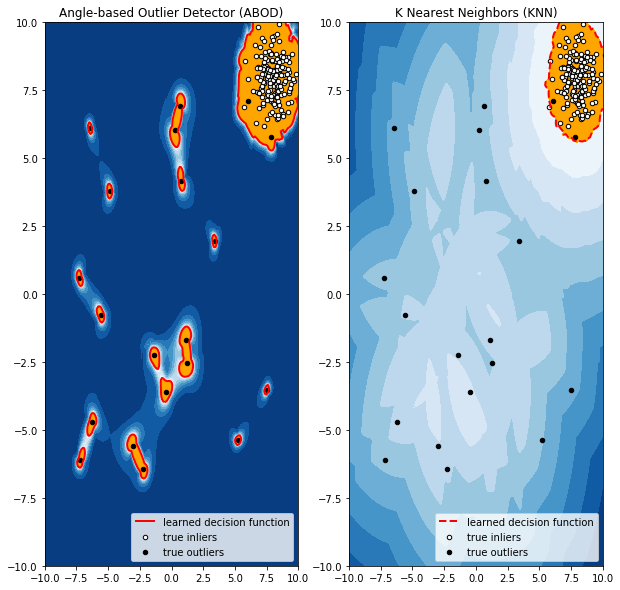

In [21]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data, get_outliers_inliers
random_state = np.random.RandomState(50)

#generate random data with two features
X_train, Y_train = generate_data(n_train=200,train_only=True, n_features=2)

# by default the outlier fraction is 0.1 in generate data function 
contamination = 0.1

# store outliers and inliers in different numpy arrays
x_outliers, x_inliers = get_outliers_inliers(X_train,Y_train)

n_inliers = len(x_inliers)
n_outliers = len(x_outliers)

#separate the two features and use it to plot the data 
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)

# create a meshgrid 
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

# scatter plot 
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2') 
plt.title('Outliers')

classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=contamination),
#     'Isolation Forest': IForest(contamination=contamination),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=contamination)
}

#set the figure size
plt.figure(figsize=(10, 10))

for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)

    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()
    print('No of Errors : ',clf_name, n_errors)

    # rest of the code is to create the visualization

    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)

    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    subplot = plt.subplot(1, 2, i + 1)

    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')

    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')

    subplot.set_title(clf_name)
    subplot.set_xlim((-10, 10))
    subplot.set_ylim((-10, 10))
plt.show() 

### Solution

Just run the above code to visualize the outliers.



### Outlier Ensembles and Combination : Isolation Forest using PyOD

It uses the scikit-learn library internally. In this method, data partitioning is done using a set of trees. Isolation Forest provides an anomaly score looking at how isolated the point is in the structure. The anomaly score is then used to identify outliers from normal observations

Isolation Forest performs well on multi-dimensional data



To use Isolation Forest model import IForest from pyod.models.iforest as shown below:

```python
from pyod.models.iforest import IForest

```

### Exercise:

Based on the previous exercise code, perform an outler analysis using generated data with Isolation Forest ensemble method.


In [35]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Import IForest model
from pyod.models.iforest import IForest
from pyod.models.pca import PCA
# Define the number of inliers and outliers
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

# Define the number of inliers and outliers
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

random_state = np.random.RandomState(42)

#Write your code below


## Solution

```python
# Define nine outlier detection tools to be compared
classifiers = {
    'Isolation Forest': IForest(contamination=outliers_fraction,
                                random_state=random_state)
}


# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

    # Fit the model
    plt.figure(figsize=(15, 12))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        clf.fit(X)
        scores_pred = clf.decision_function(X) * -1
        y_pred = clf.predict(X)
        threshold = stats.scoreatpercentile(scores_pred,
                                            100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(3, 4, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")
plt.show()
```

### Linear Models for Outlier Detection: Principle Component Analysis (PCA)

Principal component analysis (PCA) can be used in detecting outliers. PCA is a linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In this procedure, covariance matrix of the data can be decomposed to orthogonal vectors, called eigenvectors, associated with eigenvalues. The eigenvectors with high eigenvalues capture most of the variance in the data.

Therefore, a low dimensional hyperplane constructed by k eigenvectors can capture most of the variance in the data. However, outliers are different from normal data points, which is more obvious on the hyperplane constructed by the eigenvectors with small eigenvalues.

Therefore, outlier scores can be obtained as the sum of the projected distance of a sample on all eigenvectors. 

In order to use PCA for outlier analysis, import PCA as shown below: 

```python
from pyod.models.pca import PCA

```

### Exercise:

Based on the previous exercise code, perform an outler analysis using generated data with PCA model.


In [37]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Import IForest model
from pyod.models.iforest import IForest
from pyod.models.pca import PCA
# Define the number of inliers and outliers
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

# Define the number of inliers and outliers
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

random_state = np.random.RandomState(42)

#Write your code below

## Solution

```python
# Define nine outlier detection tools to be compared
classifiers = {
    'Principal Component Analysis (PCA)': PCA(
        contamination=outliers_fraction, random_state=random_state)
}


# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

    # Fit the model
    plt.figure(figsize=(15, 12))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        clf.fit(X)
        scores_pred = clf.decision_function(X) * -1
        y_pred = clf.predict(X)
        threshold = stats.scoreatpercentile(scores_pred,
                                            100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(3, 4, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")
plt.show()
```